In [1]:
import pandas as pd
import numpy as np
from numpy import array

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import timeit
import random

df = pd.read_csv("capstone_starter/profiles.csv")
print(df.education.head())





0        working on college/university
1                working on space camp
2       graduated from masters program
3        working on college/university
4    graduated from college/university
Name: education, dtype: object


In [2]:
print(df.columns)

Index([u'age', u'body_type', u'diet', u'drinks', u'drugs', u'education',
       u'essay0', u'essay1', u'essay2', u'essay3', u'essay4', u'essay5',
       u'essay6', u'essay7', u'essay8', u'essay9', u'ethnicity', u'height',
       u'income', u'job', u'last_online', u'location', u'offspring',
       u'orientation', u'pets', u'religion', u'sex', u'sign', u'smokes',
       u'speaks', u'status'],
      dtype='object')


In [3]:
print(len(df))


59946


In [4]:
print(df.age.value_counts()[0:5]
     )

26    3724
27    3685
28    3583
25    3531
29    3295
Name: age, dtype: int64


In [5]:
print(df.job.value_counts()[0:5])

other                             7589
student                           4882
science / tech / engineering      4848
computer / hardware / software    4709
artistic / musical / writer       4439
Name: job, dtype: int64


('Min: ', 18)
('DF.AGE', 26    3724
27    3685
28    3583
25    3531
29    3295
Name: age, dtype: int64)


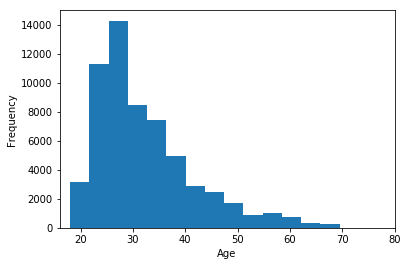

In [6]:
print("Min: ",min(df.age))
print("DF.AGE", df.age.value_counts()[0:5])
plt.hist(df.age, bins=25)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16,80)
plt.show()


In [7]:
print(df.income.value_counts())
print(df.income.head())
income_mapping = {-1:0,20000:1,100000:5,80000:4,30000:2,40000:2,50000:3,60000:3,70000:3,150000:5,1000000:5,250000:5,5000000:5}
df["income_code"] = df.income.map(income_mapping)
#df.loc[df['income_code'] != 0]
print(df.income_code.value_counts())
#Too many people said -1 for income to make any real data out of this

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64
0       -1
1    80000
2       -1
3    20000
4       -1
Name: income, dtype: int64
0.0    48442
1.0     2952
5.0     2922
3.0     2418
2.0     2053
4.0     1111
Name: income_code, dtype: int64


In [8]:
print(df.drinks.value_counts())
drink_mapping = {"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5}
df["drinks_code"] = df.drinks.map(drink_mapping)
print("DRINKS CODE:VALUE COUNTS ", df.drinks_code.value_counts())
print("DF DRINKS_CODE index 0 to 7: ", df.drinks_code[0:7])
print("DRINK CODE INDEX 0", df.drinks_code.value_counts()[0])
#print(df.drinks.head(),df.drinks_code.head())

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64
('DRINKS CODE:VALUE COUNTS ', 2.0    41780
1.0     5957
3.0     5164
0.0     3267
4.0      471
5.0      322
Name: drinks_code, dtype: int64)
('DF DRINKS_CODE index 0 to 7: ', 0    2.0
1    3.0
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
Name: drinks_code, dtype: float64)
('DRINK CODE INDEX 0', 3267)


3267


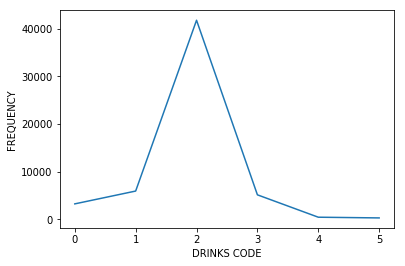

In [9]:
print(df.drinks_code.value_counts()[0])
y_drinks = []
x_drinks = []
for i in range(6):
    x_drinks.append(i)
    y_drinks.append(df.drinks_code.value_counts()[i])
plt.plot(x_drinks, y_drinks)    
plt.xlabel("DRINKS CODE")
plt.ylabel("FREQUENCY")  
plt.show()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
3.0    24494
4.0    12711
5.0    12240
2.0     2629
1.0     2576
Name: body_mapping_code, dtype: int64
('a little extra', 2.0)
59946


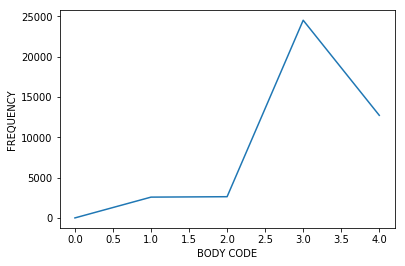

In [10]:
print(df.body_type.value_counts())
body_mapping = {"average":3, "fit":4, "athletic":5, "thin":3, "curvy":3, "a little extra":2, "skinny":1,"full figured":3, "overweight":1, "jacked":5, "used up":1,"rather not say":3,}
df["body_mapping_code"] = df.body_type.map(body_mapping)
print(df.body_mapping_code.value_counts())
print(df.body_type[0],df.body_mapping_code[0])
print(len(df.body_mapping_code))
y_body = []
x_body = []
for i in range(len(df.body_mapping_code.value_counts())):
    x_body.append(i)
    try:
        y_body.append(df.body_mapping_code.value_counts()[i])
        
    except KeyError:
        y_body.append(0)

plt.plot(x_body, y_body)    
plt.xlabel("BODY CODE")
plt.ylabel("FREQUENCY")  
plt.show()

59946
20 0
59943
95.0
1.0


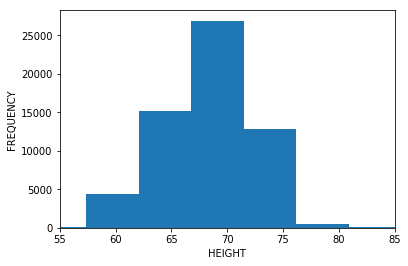

In [11]:
print(len(df.height))

count = 0
key_error = 0
for i in range(len(df)):
    try:
        if df.height[i]<= 40:
            count += 1
    except KeyError:
        key_error += 1
print count,key_error
#these aren't significant numbers that have erratic values
        
    
df = df[df.height.notnull()]

print(len(df.height))
#print(height_mapping)
print(max(df.height)) 
print(min(df.height)) 
#print(df.height.value_counts())
plt.hist(df.height, bins=20)
plt.xlabel("HEIGHT")
plt.ylabel("FREQUENCY")
plt.xlim(55,85)
plt.show()


In [12]:
tall = [73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95]
pretty_tall = [69,70,71,72]
average = [64,65,66,67,68]
short = list(range(64))
print(df.height.head())
print(len(df.height))
height_range = len(df.height)
print(height_range)
height_mapping = []
for i in range(height_range):
    try:
        height = int(df.height[i])
        if height in tall:
            height_mapping.append(5)
            
        elif height in pretty_tall: 
            height_mapping.append(4)
        elif height in average: 
            height_mapping.append(2) 
        else: 
            height_mapping.append(1)
    except KeyError:
        height_mapping.append(0)
        
df["height_code"] = height_mapping
print("DF HEIGHT HEAD",df.height.head(),"DF HEIGHT MAPPING CODE HEAD", df.height_code.head())
# print("HEIGHT MAPPING CODE HEAD",df.height_mapping_code.head())
# print("EHIGHT MAPPING VALUE COUNTS",df.height_mapping_code.value_counts())

0    75.0
1    70.0
2    68.0
3    71.0
4    66.0
Name: height, dtype: float64
59943
59943
('DF HEIGHT HEAD', 0    75.0
1    70.0
2    68.0
3    71.0
4    66.0
Name: height, dtype: float64, 'DF HEIGHT MAPPING CODE HEAD', 0    5
1    4
2    2
3    4
4    2
Name: height_code, dtype: int64)


In [13]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4", "essay5","essay6","essay7","essay8","essay9"]
all_essays = df[essay_cols].replace(np.nan,'',regex=True)
all_essays = all_essays[essay_cols].apply(lambda x:''.join(x),axis=1)
print(all_essays[0:5])




        

0    about me:<br />\n<br />\ni would love to think...
1    i am a chef: this is what that means.<br />\n1...
2    i'm not ashamed of much, but writing public te...
3    i work in a library and go to school. . .readi...
4    hey how's it going? currently vague on the pro...
dtype: object


In [14]:
# word_dict = {}
# for i in range(50):
#     split_essay = all_essays[i].split()
    
#     for word in split_essay:
#         if word.lower() in word_dict.keys():
#             word_dict[word] += 1
#         else:
#             word_dict[word] = 1
# values_words = word_dict.values()
# print(max(values_words))  


In [15]:
#     for word in split_essay:
#         if word in word_dict.keys():
#             word_dict[word] += 1
#         else:
#             word_dict[word] = 1
# values_words = word_dict.values()
# print(max(values_words))

In [16]:
# most_frequent = []
# values_words.sort()
# for key,value in word_dict.iteritems():
#     if value in values_words[-25:]:
#         most_frequent.append(key)
# print(most_frequent)
    

In [17]:
count = 0
self_words = []
chosen_words = ["i'm", 'i','me','my','have']
data_range = len(df)
j = 0
while j < data_range:
    try:
        all_essays_j = all_essays[j]
        all_essays_j.split()
        essay_len = len(all_essays_j)
        if essay_len > 0:
            for word in all_essays_j:
                if word.lower() in chosen_words:
                    count += 1
            percent_self = (count * 100)/essay_len
        else:
            percent_self = 0
        
        self_words.append(percent_self)
        count = 0
        j += 1
    except KeyError:
        self_words.append(0)
        count = 0
        j += 1
count = 0
for j in range(len(self_words)):
    if self_words[j] > 13:
        count += 1
        self_words[j] = 13
#Let's put all the self_words in a grouping of 1-5 like all the other categories.       
for k in range(len(self_words)):
    if self_words[k] in [0,1,2]:
        self_words[k] = 1
    elif self_words[k] in [3,4]:
        self_words[k] = 2
    elif self_words[k] in [5, 6,]:
        self_words[k] = 3
    elif self_words[k] in [7, 8, 9]:
        self_words[k] = 4
    elif self_words[k] in [10, 11, 12,13]:
        self_words[k] = 5


        

    

In [18]:
df["selfish_words"] = self_words
print(df.selfish_words.head())
print(min(df.selfish_words))
print(max(df.selfish_words))
print(df.selfish_words.value_counts())

0    3
1    3
2    3
3    3
4    2
Name: selfish_words, dtype: int64
1
5
3    45817
4     9197
1     2377
2     2299
5      253
Name: selfish_words, dtype: int64


In [19]:
# Premise: If someone is tall, has a good body image, doesn't drink too much,
# uses lots of selfish words, do they earn more money?

(<type 'numpy.ndarray'>, array([3, 3, 3, 1, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4]), [4, 1, 2, 2, 3, 3, 5, 1, 5, 3, 1, 5, 3, 2, 4, 5, 5, 0, 1, 5])
('SHAPE', (11504, 1))


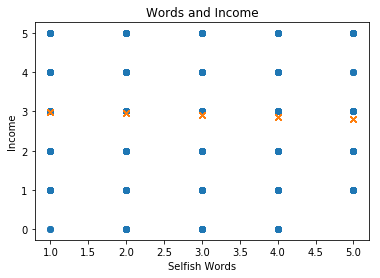

(<type 'list'>, <type 'numpy.ndarray'>)


In [20]:
#LINEAR REGRESSION
selfish_words_vals = []
income_vals = []
income_vals_index = []
df_for_plot = (df.loc[df['income_code'] != 0])
#print(df_for_plot[0:5])
#print(df_for_plot.index[2])
len_df_for_plot = len(df_for_plot)
for j in range(len_df_for_plot):
    income_vals_index.append(df_for_plot.index[j])

#print(income_vals_index)
    
# We only want to look at the values where there is an income value for the response   

for item in income_vals_index:
    try:
        selfish_words_vals.append(df.selfish_words[item])
        
        try:
            number = int(df.income_code[item])
            income_vals.append(number)

        except:
            income_vals.append(0)
    except KeyError:
        selfish_words_vals.append(0)
        income_vals.append(0)
plt.scatter(selfish_words_vals,income_vals,alpha=0.4)
plt.plot(selfish_words_vals,income_vals,"o")
plt.title("Words and Income")
plt.xlabel("Selfish Words")
plt.ylabel("Income")

selfish_words_vals_np = np.array(selfish_words_vals)
print(type(selfish_words_vals_np),selfish_words_vals_np[0:20],income_vals[0:20])
selfish_words_vals_np = selfish_words_vals_np.reshape(-1,1)
print("SHAPE",selfish_words_vals_np.shape)
line_fitter = LinearRegression()
line_fitter.fit(selfish_words_vals_np,income_vals)
income_predict = line_fitter.predict(selfish_words_vals_np)
plt.plot(selfish_words_vals_np,income_predict,"x")
plt.show()
print(type(income_vals),type(selfish_words_vals_np))

In [21]:
#MULTIPLE LINEAR REGRESSION

height_code_val = []
body_type_val = []
print income_vals_index[0:10]
print(len(income_vals_index))
print(selfish_words_vals[0:5])
for item in income_vals_index:
    try:
        if df.height_code[item] and df.body_mapping_code[item]:
            number3 = int(df.body_mapping_code[item]) 
            body_type_val.append(number3)
            number2 = int(df.height_code[item])
            height_code_val.append(number2)
    except:
        height_code_val.append(0)
        body_type_val.append(0)
print(len(body_type_val),len(height_code_val), len(selfish_words_vals), len(income_vals))        
body_type_val = array(body_type_val)
height_code_val = array(height_code_val)
selfish_words_vals = array(selfish_words_vals)
income_vals = array(income_vals)
print body_type_val.shape, height_code_val.shape,selfish_words_vals.shape, income_vals.shape



[1, 3, 11, 13, 14, 43, 48, 66, 72, 73]
11504
[3, 3, 3, 1, 3]
(11504, 11504, 11504, 11504)
(11504,) (11504,) (11504,) (11504,)


In [22]:
#Let's make a new data frame with the data that includes income
df_with_income = pd.DataFrame({'self_words':selfish_words_vals, 'height':height_code_val,'body':body_type_val, 'income':income_vals})
print(df_with_income.columns)
X = df_with_income[['self_words', 'height', 'body']]
y = df_with_income[['income']]
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=6)


Index([u'body', u'height', u'income', u'self_words'], dtype='object')


In [23]:
#Multiple Linear Regression
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
print(y.shape,X.shape)
mlr = LinearRegression()
mlr.fit(x_train,y_train)
y_predict = mlr.predict(x_test)



((9203, 3), (2301, 3), (9203, 1), (2301, 1))
((11504, 1), (11504, 3))


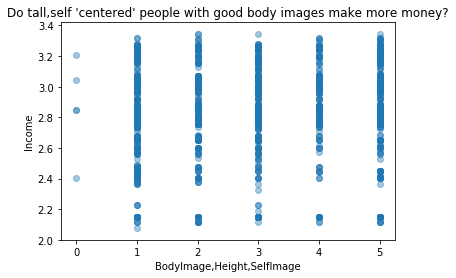

In [24]:
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("BodyImage,Height,SelfImage")
plt.ylabel("Income")
plt.title("Do tall,self 'centered' people with good body images make more money?")
plt.show()

In [25]:
print("Train score: ")
print(mlr.score(x_train,y_train))
print("Test score: ")
print(mlr.score(x_test,y_test))

Train score: 
0.032753918103644475
Test score: 
0.0420663179581493


In [33]:
#K-Nearest Neighbor Classifier
classifier = KNeighborsClassifier(n_neighbors = 5)
print(y.shape)
income_dataset = []

for i in range(len(df_with_income)):
    income_dataset.append([df_with_income.self_words[i], df_with_income.height[i], df_with_income.body[i]])
print(income_dataset[0:10]) 
print(income_vals[0:10])
classifier.fit(income_dataset, income_vals)
unknowns = [[5,5,5],[1,1,1],[3,3,3],[2,5,1], [5,5,2],[2,1,1]]
guesses = classifier.predict(unknowns)
print(guesses)
print(classifier.score(income_dataset, income_vals))


(11504, 1)
[[3, 4, 3], [3, 4, 3], [3, 4, 3], [1, 2, 1], [3, 1, 3], [3, 4, 4], [3, 2, 3], [4, 2, 5], [3, 5, 5], [3, 1, 3]]
[4 1 2 2 3 3 5 1 5 3]
[5 1 1 3 1 1]
0.2798157162726008


In [36]:
#K-Nearest Neighbor Regressor
regressor = KNeighborsRegressor(n_neighbors = 5, weights = "distance")
training_points = income_dataset
training_values = income_vals
regressor.fit(training_points, training_values)
unknown_points = [[5,5,5],[1,1,1],[3,3,3],[2,5,1],[5,5,2],[2,1,1]]
guesses = regressor.predict(unknown_points)
print(guesses)
print(regressor.score(training_points, training_values))


[5.  2.  1.8 3.  1.8 1. ]
-0.18329779767506005


In [35]:
#Support Vector Machines -Linear Kernel
classifier = SVC(kernel = 'linear',C=0.0001)
classifier.fit(training_points, training_values)
print(classifier.predict([[5,5,5],[1,1,1],[3,3,3],[2,5,1],[5,5,2],[2,1,1]]))
#Get the same result from C between .0001 to 1
print(classifier.score(training_points, training_values))

[5 1 1 1 1 1]
0.3204972183588317


In [29]:
#Support Vector Machines-RBF (Radial Bias Function Kernel)
# training_data, validation_data, training_labels, validation_labels = train_test_split(training_points, training_values,train_size=0.8, test_size=0.2,random_state=100)
# classifier = SVC(kernel = 'rbf', gamma = 0.1)
# classifier.fit(training_data, training_labels)
# print(classifier.score(validation_data,validation_labels))


In [30]:
#K=Means++ using Scikit-Learn time it takes
worst = 0
total = 0
for i in range(100):
    start = timeit.default_timer()
    model = KMeans(init="random", n_clusters = 5)
    results = model.fit_predict(training_points,training_values)
    stop = timeit.default_timer()
    run = stop - start
    total += run
    if run > worst:
        worst = run
print("Worst RANDOM ", worst) 
print("Average Run Time RANDOM ", total/100)
worst = 0
total = 0
for i in range(100):
    start = timeit.default_timer()
    model = KMeans(init="k-means++", n_clusters = 5)
    results = model.fit_predict(training_points,training_values)
    stop = timeit.default_timer()
    run = stop - start
    total += run
    if run > worst:
        worst = run
print("Worst K-Means++ ", worst) 
print("Average Run Time K-Means++ ", total/100)


('Worst RANDOM ', 0.19533681869506836)
('Average Run Time RANDOM ', 0.13164746761322021)
('Worst K-Means++ ', 0.24747490882873535)
('Average Run Time K-Means++ ', 0.14405011653900146)
